# Q3.1: CNN on MNIST - Optimizer Comparison

Train the same CNN on MNIST using **Adam vs Adagrad** and compare performance.

**Exam outputs:** accuracy/loss curves and confusion matrix for each optimizer.

## Step 1: Import Libraries

In [2]:
# Install tensorflow if not already installed (this line should be executed first)
try:
    import tensorflow
except ImportError:
    print("TensorFlow not found. Installing now...")
    !pip install tensorflow
    print("TensorFlow installed. Please restart the runtime to ensure all imports work correctly.")

TensorFlow not found. Installing now...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 830.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 148.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 130.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.1 MB/s eta 0:00:00
TensorFlow installed. Please restart the runtime to ensure all imports work correctly.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


## Step 2: Load and Preprocess Data

### Load MNIST Dataset

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train Shape: (60000, 28, 28)
Test Shape: (10000, 28, 28)


### Preprocess Images

In [5]:
# Reshape for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"\nProcessed Train Shape: {X_train.shape}")
print(f"Processed Test Shape: {X_test.shape}")


Processed Train Shape: (60000, 28, 28, 1)
Processed Test Shape: (10000, 28, 28, 1)


## Step 3: Build CNN Model

In [6]:
def create_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

model = create_cnn()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Step 4: Train with Adam Optimizer

### Compile and Train

In [7]:
model_adam = create_cnn()
model_adam.compile(optimizer=Adam(),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_adam = model_adam.fit(X_train, y_train_cat,
                              epochs=10,
                              batch_size=128,
                              validation_data=(X_test, y_test_cat),
                              verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8646 - loss: 0.4649 - val_accuracy: 0.9762 - val_loss: 0.0712
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9817 - loss: 0.0610 - val_accuracy: 0.9870 - val_loss: 0.0406
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9875 - loss: 0.0397 - val_accuracy: 0.9890 - val_loss: 0.0347
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9910 - loss: 0.0288 - val_accuracy: 0.9893 - val_loss: 0.0302
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9928 - loss: 0.0233 - val_accuracy: 0.9897 - val_loss: 0.0301
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9938 - loss: 0.0183 - val_accuracy: 0.9900 - val_loss: 0.0300
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9959 - loss: 0.0131 - val_accuracy: 0.9903 - val_loss: 0.0295
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9963 - loss: 0.0117 - 

## Step 5: Train with Adagrad Optimizer

### Compile and Train

In [8]:
model_adagrad = create_cnn()
model_adagrad.compile(optimizer=Adagrad(),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_adagrad = model_adagrad.fit(X_train, y_train_cat,
                                    epochs=10,
                                    batch_size=128,
                                    validation_data=(X_test, y_test_cat),
                                    verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.2217 - loss: 2.2519 - val_accuracy: 0.6671 - val_loss: 2.0227
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.7134 - loss: 1.8063 - val_accuracy: 0.8104 - val_loss: 0.9707
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8216 - loss: 0.8343 - val_accuracy: 0.8676 - val_loss: 0.5422
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8635 - loss: 0.5245 - val_accuracy: 0.8915 - val_loss: 0.4168
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8874 - loss: 0.4192 - val_accuracy: 0.9043 - val_loss: 0.3568
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8982 - loss: 0.3653 - val_accuracy: 0.9102 - val_loss: 0.3212
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9072 - loss: 0.3336 - val_accuracy: 0.9211 - val_loss: 0.2924
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9134 - loss: 0.3044 - 

## Step 6: Plot Training vs Validation Accuracy

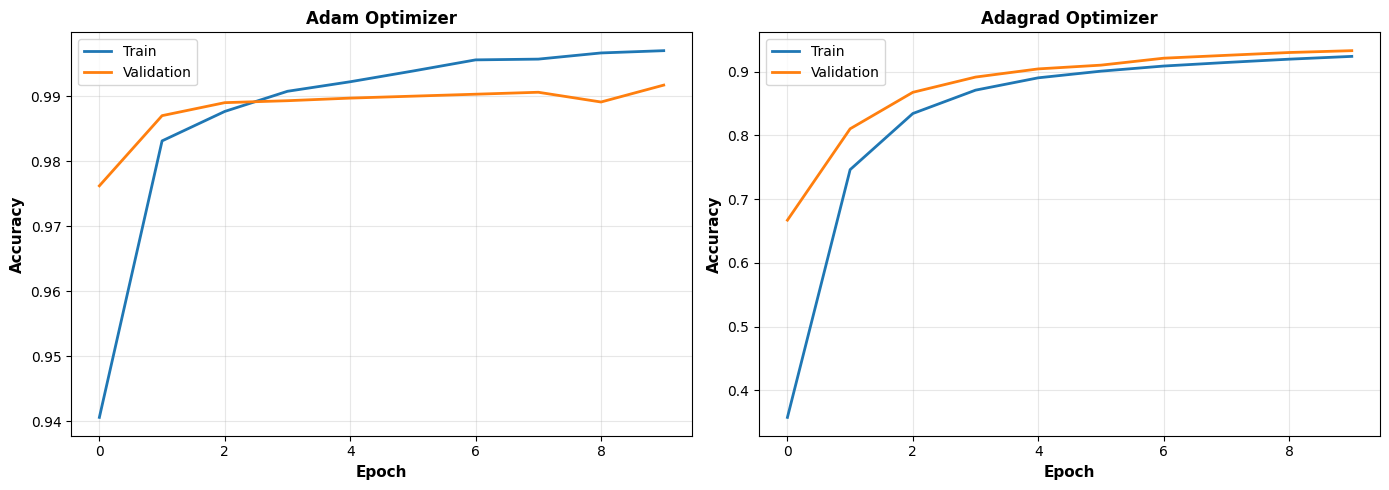

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Adam
ax1.plot(history_adam.history['accuracy'], label='Train', linewidth=2)
ax1.plot(history_adam.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('Adam Optimizer', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Adagrad
ax2.plot(history_adagrad.history['accuracy'], label='Train', linewidth=2)
ax2.plot(history_adagrad.history['val_accuracy'], label='Validation', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax2.set_title('Adagrad Optimizer', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 7: Evaluate and Compare Performance

### Adam Evaluation

In [10]:
y_pred_adam = model_adam.predict(X_test, verbose=0).argmax(axis=1)
acc_adam = (y_pred_adam == y_test).mean()

print("Adam Optimizer Results:")
print(f"Test Accuracy: {acc_adam:.4f}")
print(f"Precision (weighted): {precision_score(y_test, y_pred_adam, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, y_pred_adam, average='weighted'):.4f}")

Adam Optimizer Results:
Test Accuracy: 0.9917
Precision (weighted): 0.9917
Recall (weighted): 0.9917


### Adagrad Evaluation

In [11]:
y_pred_adagrad = model_adagrad.predict(X_test, verbose=0).argmax(axis=1)
acc_adagrad = (y_pred_adagrad == y_test).mean()

print("\nAdagrad Optimizer Results:")
print(f"Test Accuracy: {acc_adagrad:.4f}")
print(f"Precision (weighted): {precision_score(y_test, y_pred_adagrad, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, y_pred_adagrad, average='weighted'):.4f}")


Adagrad Optimizer Results:
Test Accuracy: 0.9329
Precision (weighted): 0.9328
Recall (weighted): 0.9329


## Step 8: Confusion Matrix

### Adam Confusion Matrix

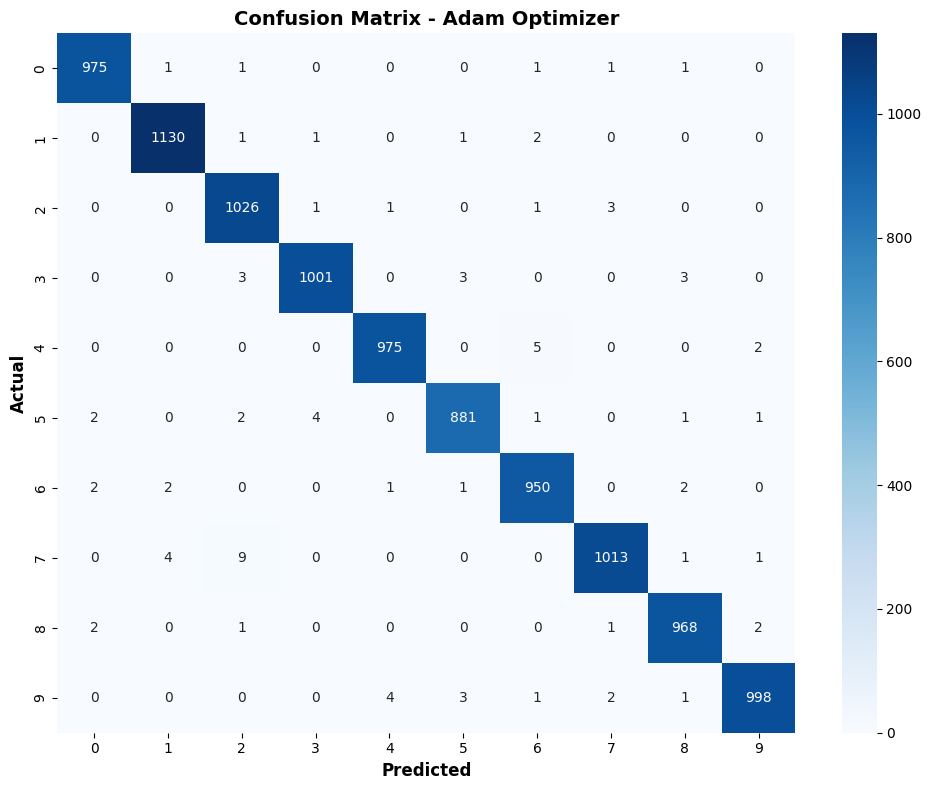

In [12]:
cm_adam = confusion_matrix(y_test, y_pred_adam)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_adam, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Adam Optimizer', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Adagrad Confusion Matrix

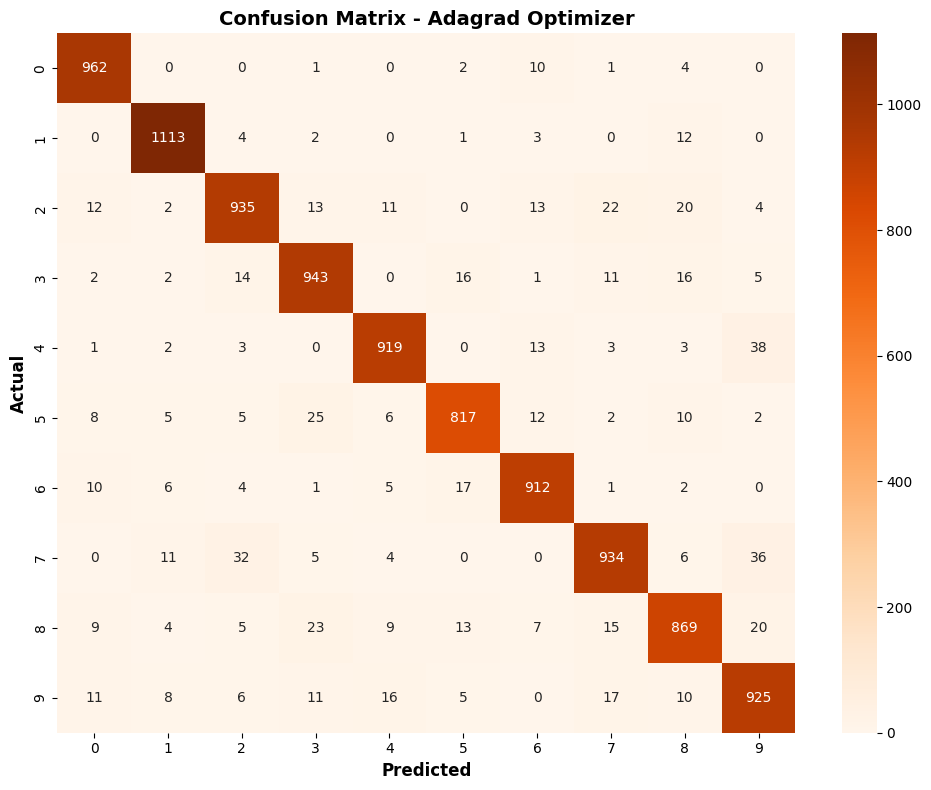

In [13]:
cm_adagrad = confusion_matrix(y_test, y_pred_adagrad)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_adagrad, annot=True, fmt='d', cmap='Oranges', cbar=True)
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Adagrad Optimizer', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 9: Comparison Summary

In [14]:
print("\n" + "="*60)
print("OPTIMIZER COMPARISON: ADAM vs ADAGRAD")
print("="*60)
print(f"{'Optimizer':<15} | {'Accuracy':<12} | {'Precision':<12} | {'Recall':<12}")
print("-"*60)
print(f"{'Adam':<15} | {acc_adam:<12.4f} | {precision_score(y_test, y_pred_adam, average='weighted'):<12.4f} | {recall_score(y_test, y_pred_adam, average='weighted'):<12.4f}")
print(f"{'Adagrad':<15} | {acc_adagrad:<12.4f} | {precision_score(y_test, y_pred_adagrad, average='weighted'):<12.4f} | {recall_score(y_test, y_pred_adagrad, average='weighted'):<12.4f}")
print("="*60)

if acc_adam > acc_adagrad:
    print(f"\nAdam performs better with {(acc_adam-acc_adagrad)*100:.2f}% higher accuracy")
else:
    print(f"\nAdagrad performs better with {(acc_adagrad-acc_adam)*100:.2f}% higher accuracy")


OPTIMIZER COMPARISON: ADAM vs ADAGRAD
Optimizer       | Accuracy     | Precision    | Recall      
------------------------------------------------------------
Adam            | 0.9917       | 0.9917       | 0.9917      
Adagrad         | 0.9329       | 0.9328       | 0.9329      

Adam performs better with 5.88% higher accuracy
